# **1. Install Library**

In [1]:
# ! pip install mlxtend==0.21.0

In [1]:
import os
import random
import numpy as np
import tensorflow as tf

seed_value=100
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import logging
import tensorflow as tf
tf.get_logger().setLevel(logging.ERROR)

# **2. Read Data**

## 2.1 unrar

In [4]:
# ! unrar x drive/MyDrive/Data_FastRNN.rar

## 2.2 read data main

In [5]:
import pandas as pd
data_main=pd.read_excel("data_fastrnn1.xlsx",header=[1],sheet_name='کگل')
data_main

,نماد,firm,date,تاریخ شمسی,داده ها از 90 تا 1400,اولين قيمت,بالاترين قيمت,كمترين قيمت,قيمت پاياني,ارزش معاملات,...,dps,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار
0,Gol-E-Gohar.,1,2011/03/27,1390/01/07,1,10443,10443,10120,10426,16528141996,...,1400,971,6.774154,0.355860,7.213913,24199.8,21.825323,1.106293e+05,123.512542,10384
1,Gol-E-Gohar.,1,2011/03/28,1390/01/08,2,10469,10788,10171,10548,13762777398,...,1400,971,6.774154,0.355860,7.213913,24287.8,21.897961,1.056489e+05,123.535799,10392
2,Gol-E-Gohar.,1,2011/03/29,1390/01/09,3,10969,10969,10961,10969,25963101783,...,1400,971,6.774154,0.355860,7.213913,24486.6,21.970427,1.006767e+05,123.558883,10394
3,Gol-E-Gohar.,1,2011/03/30,1390/01/10,4,11299,11299,10531,10685,26539788761,...,1400,971,6.774154,0.355860,7.213913,24486.0,22.042720,9.571276e+04,123.581796,10400
4,Gol-E-Gohar.,1,2011/04/03,1390/01/14,5,10680,10949,10410,10607,15095710779,...,1400,971,6.774154,0.355860,7.213913,24543.6,22.330171,7.593937e+04,123.671725,10397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Gol-E-Gohar.,1,2022/03/13,1400/12/22,2359,12480,12560,11990,12520,255101394770,...,1300,1903,11.639517,0.416442,8.531519,1335376.4,30.096101,1.167731e+07,117.357425,42000
2359,Gol-E-Gohar.,1,2022/03/14,1400/12/23,2360,12800,13000,12670,12750,218679614010,...,1300,1903,11.639517,0.416442,8.531519,1334776.9,29.929022,1.167140e+07,117.717380,42000
2360,Gol-E-Gohar.,1,2022/03/15,1400/12/24,2361,12870,12960,12750,12920,345585566200,...,1300,1903,11.639517,0.416442,8.531519,1337223.2,29.761546,1.166546e+07,118.078071,42000
2361,Gol-E-Gohar.,1,2022/03/16,1400/12/25,2362,12930,13000,12800,12980,192340713550,...,1300,1903,11.639517,0.416442,8.531519,1345018.2,29.593672,1.165950e+07,118.439497,42000


# **3. Preproceesing Data**

In [6]:
data_main.isna().sum()

نماد                      0
firm                      0
date                      0
تاریخ شمسی                0
داده ها از 90 تا 1400     0
اولين قيمت                0
بالاترين قيمت             0
كمترين قيمت               0
قيمت پاياني               0
ارزش معاملات              0
حجم معاملات               0
قيمت پيش گشايش            0
قيمت اولي                 0
آخرين قيمت                0
MA(5)                     4
MA(12)                   11
MA(26)                   25
EMA(12)                   0
EMA(26)                   0
MACD                     25
RSI                      14
dps                       0
eps                       0
p_e                       0
roa                       0
size                      0
شاخص کل                   1
تورم                      3
طلا                       3
نفت                       3
دلار                      0
dtype: int64

In [7]:
data_main_pre=data_main.fillna(0)
data_main_pre['lbl']=data_main_pre['قيمت پاياني']
data_main_pre.drop(['date','نماد','firm','داده ها از 90 تا 1400','تاریخ شمسی','قيمت اولي'],axis=1,inplace=True)
data_main_pre.drop('قيمت پاياني',axis=1,inplace=True)
data_main_pre

,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,آخرين قيمت,MA(5),MA(12),MA(26),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
0,10443,10443,10120,16528141996,1585297,184,10350,0.0,0.000000,0.000000,...,971,6.774154,0.355860,7.213913,24199.8,21.825323,1.106293e+05,123.512542,10384,10426
1,10469,10788,10171,13762777398,1302450,362,10711,0.0,0.000000,0.000000,...,971,6.774154,0.355860,7.213913,24287.8,21.897961,1.056489e+05,123.535799,10392,10548
2,10969,10969,10961,25963101783,2366961,225,10969,0.0,0.000000,0.000000,...,971,6.774154,0.355860,7.213913,24486.6,21.970427,1.006767e+05,123.558883,10394,10969
3,11299,11299,10531,26539788761,2483774,517,10665,0.0,0.000000,0.000000,...,971,6.774154,0.355860,7.213913,24486.0,22.042720,9.571276e+04,123.581796,10400,10685
4,10680,10949,10410,15095710779,1423684,270,10660,10671.0,0.000000,0.000000,...,971,6.774154,0.355860,7.213913,24543.6,22.330171,7.593937e+04,123.671725,10397,10607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,12480,12560,11990,255101394770,20380118,1780,12560,11856.0,16109.166667,19156.923077,...,1903,11.639517,0.416442,8.531519,1335376.4,30.096101,1.167731e+07,117.357425,42000,12520
2359,12800,13000,12670,218679614010,17144947,2409,12760,12108.0,15334.166667,18809.230769,...,1903,11.639517,0.416442,8.531519,1334776.9,29.929022,1.167140e+07,117.717380,42000,12750
2360,12870,12960,12750,345585566200,26744879,2447,12930,12370.0,14563.333333,18480.000000,...,1903,11.639517,0.416442,8.531519,1337223.2,29.761546,1.166546e+07,118.078071,42000,12920
2361,12930,13000,12800,192340713550,14819542,1547,12980,12646.0,13797.500000,18152.692308,...,1903,11.639517,0.416442,8.531519,1345018.2,29.593672,1.165950e+07,118.439497,42000,12980


In [8]:
data_final=data_main_pre

In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
print("Original descriptives:")
display(data_final.describe().round(2))

print("\nMin-Max-scaled descriptives:")
scaler = MinMaxScaler(feature_range=(0,1)) #StandardScaler()  #
scaler.fit(data_final)
data_scaled = scaler.transform(data_final)
df_scaled = pd.DataFrame(data_scaled, index=data_final.index, columns=data_final.columns)
display(df_scaled.describe().round(2))
data_normal=df_scaled


Original descriptives:


,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,آخرين قيمت,MA(5),MA(12),MA(26),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
count,2363.00,2363.00,2363.00,2.363000e+03,2.363000e+03,2363.00,2363.00,2363.00,2363.00,2363.00,...,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00
mean,8444.77,8584.32,8289.41,9.406772e+10,8.867162e+06,1102.52,8432.57,8412.63,8377.99,8290.25,...,1160.94,7.87,0.29,7.96,334874.18,28.51,3862160.39,68.47,31130.73,8452.84
std,6098.65,6223.15,5961.96,2.040476e+11,1.397719e+07,1883.53,6100.15,6095.15,6089.29,6061.15,...,643.76,2.24,0.12,0.39,503319.96,17.42,4086265.85,27.62,10951.72,6091.26
min,1616.00,1694.00,1616.00,2.186325e+06,1.107000e+03,2.00,1640.00,0.00,0.00,0.00,...,230.00,3.92,0.08,7.21,0.00,0.00,0.00,0.00,10384.00,1689.00
25%,3344.00,3373.00,3285.50,6.205798e+09,1.145010e+06,191.00,3331.50,3312.50,3303.00,3272.25,...,474.00,6.55,0.15,7.76,63519.85,12.64,1010199.36,49.68,25334.00,3349.50
50%,6801.00,6871.00,6690.00,2.170553e+10,4.061257e+06,439.00,6770.00,6763.40,6796.67,6814.54,...,1216.00,7.65,0.31,7.89,79855.70,26.53,1341694.94,58.10,32366.00,6781.00
75%,11761.50,11868.50,11513.50,8.403647e+10,1.060410e+07,1106.50,11706.50,11602.10,11575.54,11305.87,...,1903.00,10.55,0.42,8.32,256897.70,39.15,5564212.74,79.23,42000.00,11730.50
max,26320.00,26900.00,25600.00,2.993841e+12,1.690405e+08,24821.00,26320.00,25012.00,24305.00,24049.62,...,2235.00,11.64,0.44,8.53,2078546.80,65.10,12334149.58,125.10,44120.00,26300.00



Min-Max-scaled descriptives:


,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,آخرين قيمت,MA(5),MA(12),MA(26),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
count,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,...,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00,2363.00
mean,0.28,0.27,0.28,0.03,0.05,0.04,0.28,0.34,0.34,0.34,...,0.46,0.51,0.57,0.57,0.16,0.44,0.31,0.55,0.61,0.27
std,0.25,0.25,0.25,0.07,0.08,0.08,0.25,0.24,0.25,0.25,...,0.32,0.29,0.33,0.29,0.24,0.27,0.33,0.22,0.32,0.25
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.07,0.07,0.07,0.00,0.01,0.01,0.07,0.13,0.14,0.14,...,0.12,0.34,0.18,0.41,0.03,0.19,0.08,0.40,0.44,0.07
50%,0.21,0.21,0.21,0.01,0.02,0.02,0.21,0.27,0.28,0.28,...,0.49,0.48,0.64,0.51,0.04,0.41,0.11,0.46,0.65,0.21
75%,0.41,0.40,0.41,0.03,0.06,0.04,0.41,0.46,0.48,0.47,...,0.83,0.86,0.93,0.84,0.12,0.60,0.45,0.63,0.94,0.41
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [10]:
data_ready = data_normal.copy()
lbl_ready=data_normal.iloc[:,-1]

print("_"*50)
print("data_final shape: {0}".format(data_ready.shape))
print("lbl_final shape: {0}".format(lbl_ready.shape))
print("_"*50)

__________________________________________________
data_final shape: (2363, 25)
lbl_final shape: (2363,)
__________________________________________________


# **4. Visualization Data**

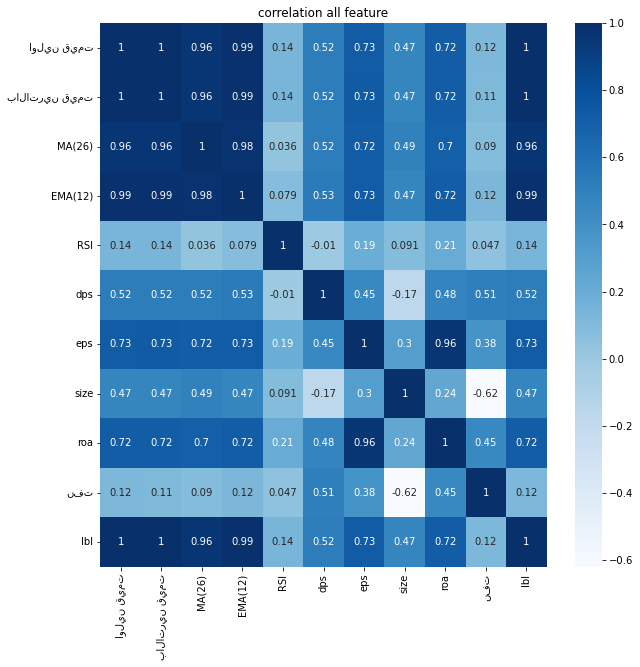

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
cor = data_ready.iloc[:,[0,1,9,10,13,14,15,18,17,22,-1]].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.title("correlation all feature")
plt.show()

In [12]:
import numpy as np
col_names=data_ready.columns
cor_abs=np.abs(cor.iloc[:,-1])
idx_sort=np.argsort(cor_abs)
sort_cor=np.round(cor_abs[idx_sort],4)
col_names_new=np.array(col_names)
col_names_sort=col_names_new[idx_sort]
for i, item in  enumerate(col_names_sort):
  print('number: {0} , colums: {1} cor: {2}'.format(i,item,sort_cor[i]))


number: 0 , colums: MA(26) cor: 0.1151
number: 1 , colums: حجم معاملات cor: 0.1365
number: 2 , colums: MA(5) cor: 0.4701
number: 3 , colums: قيمت پيش گشايش cor: 0.5248
number: 4 , colums: MA(12) cor: 0.7201
number: 5 , colums: آخرين قيمت cor: 0.7276
number: 6 , colums: كمترين قيمت cor: 0.9594
number: 7 , colums: ارزش معاملات cor: 0.9932
number: 8 , colums: اولين قيمت cor: 0.9994
number: 9 , colums: بالاترين قيمت cor: 0.9997
number: 10 , colums: EMA(12) cor: 1.0


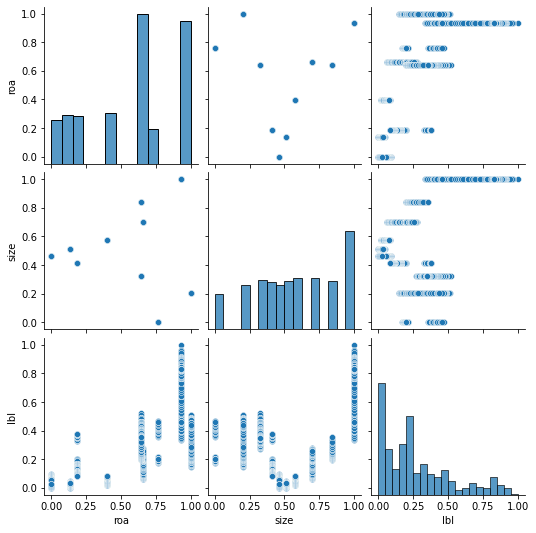

In [13]:
# importing packages
import seaborn
# pairplot with 
seaborn.pairplot(data_ready[['roa','size','lbl']])
# to show
plt.show()

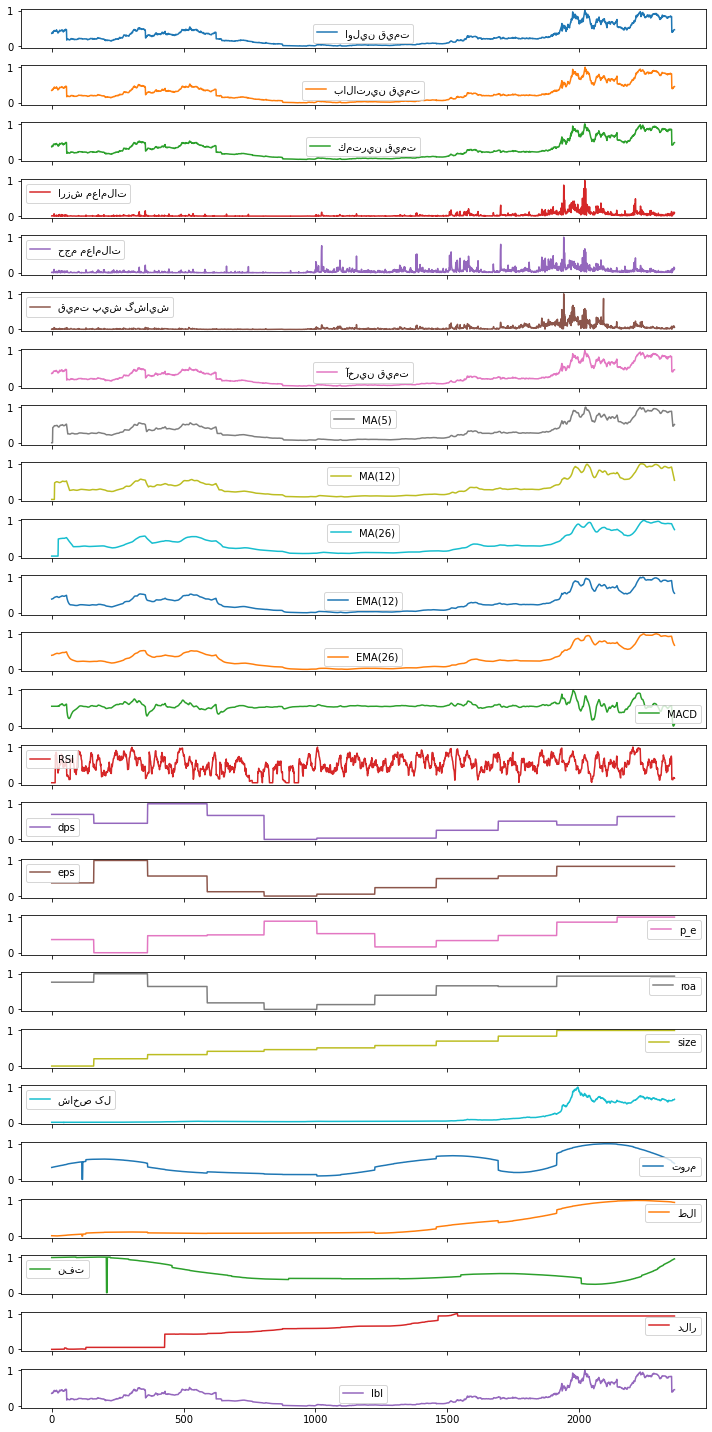

In [14]:
data_ready.plot(subplots=True,figsize=(10,20));
plt.tight_layout(); # <- this is often necessary when using subplots to avoid 

<Figure size 432x288 with 0 Axes>

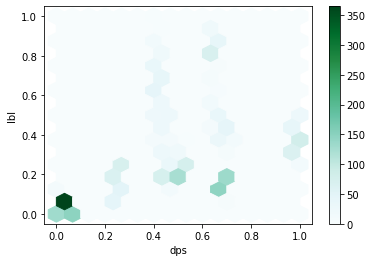

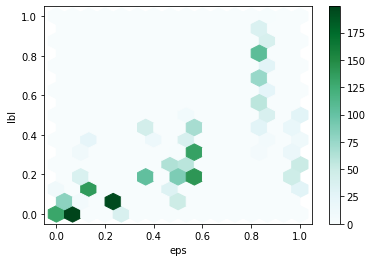

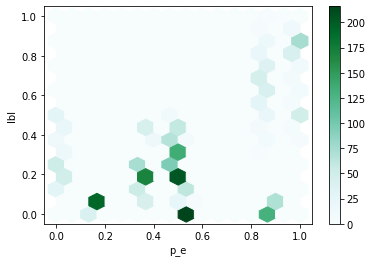

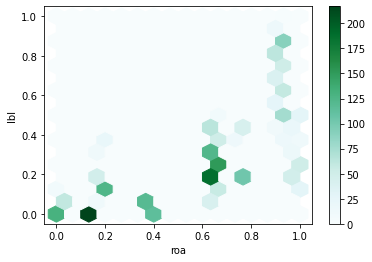

In [15]:
plt.figure()
data_ready.plot(kind="hexbin", x=data_ready.columns[14], y=data_ready.columns[-1], gridsize=15, sharex=False);
data_ready.plot(kind="hexbin", x=data_ready.columns[15], y=data_ready.columns[-1], gridsize=15, sharex=False);
data_ready.plot(kind="hexbin", x=data_ready.columns[16], y=data_ready.columns[-1], gridsize=15, sharex=False);
data_ready.plot(kind="hexbin", x=data_ready.columns[17], y=data_ready.columns[-1], gridsize=15, sharex=False);
plt.show()

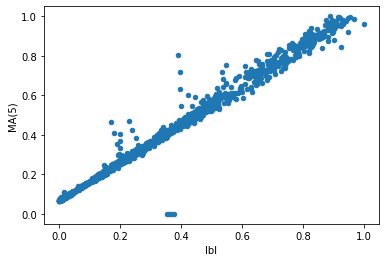

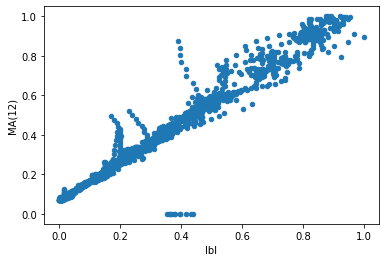

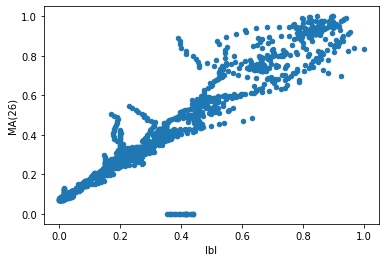

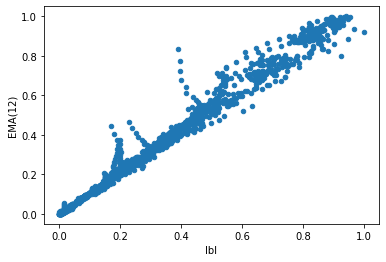

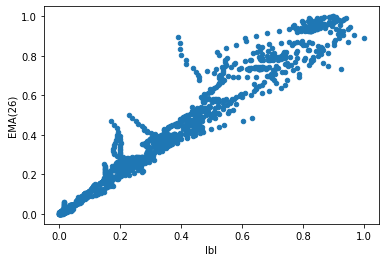

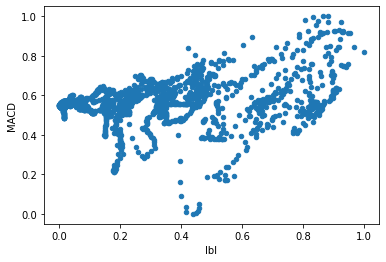

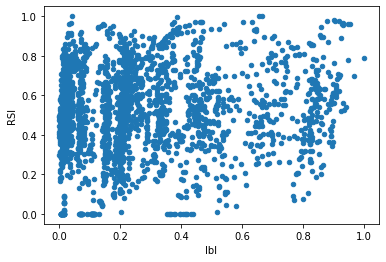

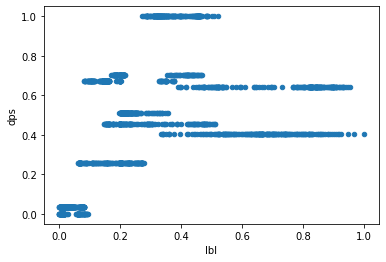

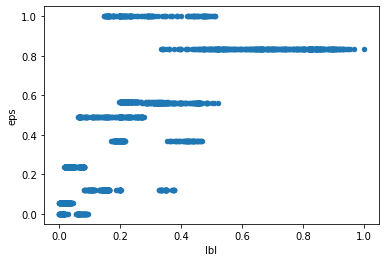

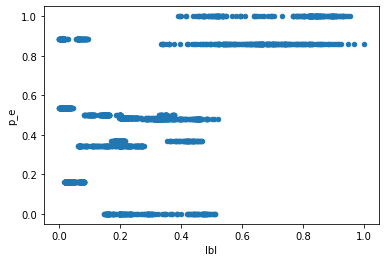

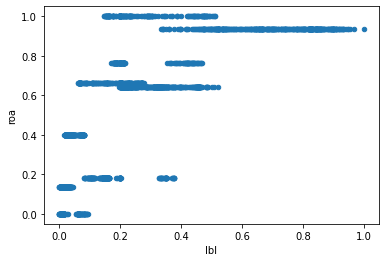

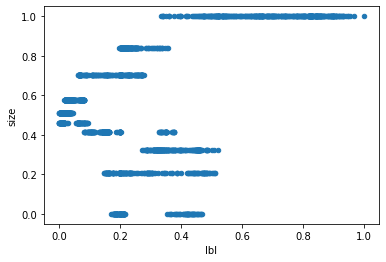

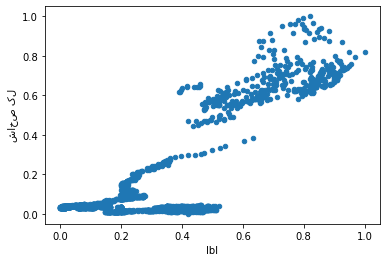

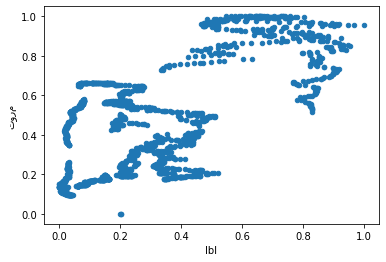

In [ ]:
for i in range(8,22):
  data_ready.plot(data_ready.columns[-1], data_ready.columns[i], kind="scatter")

# **5. time window**

In [16]:
data_ready.columns

Index(['اولين قيمت', 'بالاترين قيمت', 'كمترين قيمت', 'ارزش معاملات',
       'حجم معاملات', 'قيمت پيش گشايش', 'آخرين قيمت', 'MA(5)', 'MA(12)',
       'MA(26)', 'EMA(12)', 'EMA(26)', 'MACD', 'RSI', 'dps', 'eps', 'p_e',
       'roa', 'size', 'شاخص کل', 'تورم', 'طلا', 'نفت', 'دلار', 'lbl'],
      dtype='object')

In [17]:
n_batch=32
feature_input_FastRNN=data_ready.columns.tolist()
feature_out_FastRNN=['lbl']
n_sequence=7

In [18]:
import numpy as np

def multivariate_win(dataset, target, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []
    start_index=0
    end_index = None
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)




In [19]:
STEP =1
n_step=1
past_history = n_sequence
index_precentage = -1

data_can,lbl_candel=multivariate_win(data_ready[feature_input_FastRNN].values,
                                            data_ready[feature_out_FastRNN].values,
                                            past_history,
                                            n_step, STEP,
                                            single_step=True)
print("_"*50)
print('-> data_can  shape = {0}'.format(data_can.shape))
print('-> lbl shape = {0}'.format(lbl_candel.shape))
print("_"*50)


__________________________________________________
-> data_can  shape = (2355, 7, 25)
-> lbl shape = (2355, 1)
__________________________________________________


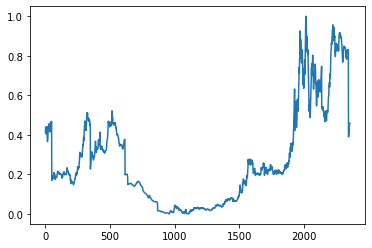

In [16]:
plt.plot(lbl_candel)
plt.show()

# **6. Train test split**

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_can , lbl_candel, test_size=0.10,shuffle=False, random_state=42)
print("", X_train.shape, "\n", y_train.shape, 
      "\n", X_test.shape, "\n", y_test.shape)

 (2119, 7, 25) 
 (2119, 1) 
 (236, 7, 25) 
 (236, 1)


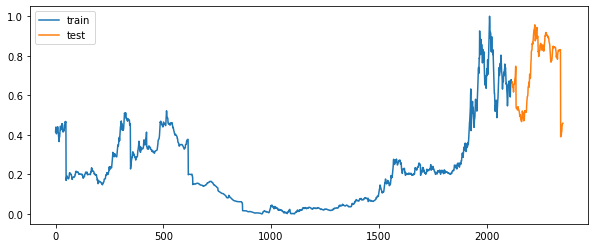

In [21]:
plt.figure(figsize=(10,4))
plt.plot(range(len(y_train)),y_train)
plt.plot(range(len(y_train),len(y_train)+len(y_test)),y_test)
plt.legend(['train','test'])
plt.show()

In [22]:
def fun_pre(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)


def plot_pie(values,hlabels,uexplode=[0,0.1],my_color=["red","blue"]):
    plt.pie(values, 
            labels =hlabels,
            explode=uexplode,
            colors=my_color,
            autopct = lambda pct: fun_pre(pct, values))
    plt.legend()
    plt.show() 

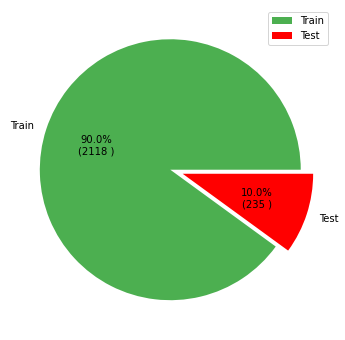

In [23]:
import matplotlib.pyplot as plt
import numpy as np
hlabels=["Train","Test"]
mycolors = [ "#4CAF50","red","blue","#0CFFF0"]

class1=X_train.shape[0]
class2=X_test.shape[0]


values=[class1,class2]
plt.figure(figsize=(6,6))
plt.title("",fontsize=14)
plot_pie(values,hlabels,[0,0.1],mycolors)
plt.show()

# **7.Horse herd optimization algorithm**

In [24]:
import numpy as np

def shpere(x):
    z=np.array(x)
    z=np.sum(x**2)
    return z


## 6.1 base code 

In [25]:
class Particle():
  def __init__(self):
          self.Position=[]
          self.Cost=[]
          self.Velocity=[]
          self.Best=[]

In [26]:
def HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt):

  w=1;
  phiD=0.02;
  phiI=0.02;


  g_Alpha=1.50;       #Grazing
  d_Alpha=0.5;        #Defense Mechanism
  h_Alpha=1.5;        #Hierarchy

  g_Beta=1.50;       # Grazing
  h_Beta=0.9;        #Hierarchy 
  s_Beta=0.20;       #Sociability
  d_Beta=0.20;       #Defense Mechanism

  g_Gamma=1.50;      #Grazing 
  h_Gamma=0.50;      #Hierarchy 
  s_Gamma=0.10;      #Sociability 
  i_Gamma=0.30;      #Imitation
  d_Gamma=0.10;      #Defense Mechanism 
  r_Gamma=0.05;      #Random (Wandering and Curiosity)

  g_Delta=1.50;      #Grazing
  r_Delta=0.10;      #Random (Wandering and Curiosity) 

  # Velocity limits
  VelMax = 0.3 * (VarMax - VarMin)
  VelMin = -VelMax



  Hourse = [Particle() for _ in range(nHourse)]
  GlobalBest=Particle()
  GlobalBest.Cost=np.inf;
  CostPositionCounter=np.zeros((nHourse,2+nVar));


  for i in range(nHourse):
      #Initialize Position
      Hourse[i].Position=np.random.uniform(VarMin, VarMax,VarSize)[0]
      #Initialize Velocity
      Hourse[i].Velocity=np.zeros(VarSize)

      #Evaluation
      Hourse[i].Cost= CostFunction(Hourse[i].Position);
      #Update Personal Best
      Hourse[i].Best=deepcopy(Hourse[i])

      #Update Global Best
      if Hourse[i].Best.Cost<GlobalBest.Cost:
          GlobalBest=Hourse[i].Best;  
      ans=[i, Hourse[i].Best.Cost]
      ans.extend(Hourse[i].Best.Position.tolist())
      CostPositionCounter[i,:]=ans;

  BestCost = np.zeros((MaxIt, 1))

  #%%  Main Loop
  for it in range(MaxIt):
    CostPositionCounter=CostPositionCounter[CostPositionCounter[:, 1].argsort()]
    MeanPosition=np.mean(CostPositionCounter[0:nHourse,2:],axis=0);
    BadPosition=np.mean(CostPositionCounter[int((1-phiD)*nHourse):nHourse,2:],axis=0);
    GoodPosition=np.mean(CostPositionCounter[1:int(phiI*nHourse),2:],axis=0);
    for i in range(nHourse):
      CC=np.argwhere(CostPositionCounter[:,0]==i)[0][0]
      # Update Velocity
      if CC<=0.1*nHourse:
        Hourse[i].Velocity = h_Alpha*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
        -d_Alpha*rand(VarSize[1])*(Hourse[i].Position)\
        +g_Alpha*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position)
                
      elif CC<=0.3*nHourse:
        Hourse[i].Velocity = s_Beta*rand(VarSize[1])*(MeanPosition-Hourse[i].Position)\
            -d_Beta*rand(VarSize[1])*(BadPosition-Hourse[i].Position)\
            +h_Beta*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
            +g_Beta*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position)
          
      elif CC<=0.6*nHourse:
        Hourse[i].Velocity = s_Gamma*rand(VarSize[1])*(MeanPosition-Hourse[i].Position)\
        +r_Gamma*rand(VarSize[1])*(Hourse[i].Position)\
        -d_Gamma*rand(VarSize[1])*(BadPosition-Hourse[i].Position)\
        +h_Gamma*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
        +i_Gamma*rand(VarSize[1])*(GoodPosition-Hourse[i].Position)\
        +g_Gamma*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position);
          
          
      else:
        Hourse[i].Velocity = +r_Delta*rand(VarSize[1])*(Hourse[i].Position)\
        +g_Delta*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position);

      # Apply Velocity Limits
      Hourse[i].Velocity = np.maximum(Hourse[i].Velocity,VelMin);
      Hourse[i].Velocity = np.minimum(Hourse[i].Velocity,VelMax); 

      # Update Position
      Hourse[i].Position = Hourse[i].Position + Hourse[i].Velocity;
      
      # Velocity Mirror Effect
      IsOutside=(np.less(Hourse[i].Position, VarMin)\
                  | np.greater(Hourse[i].Position, VarMax))
      # IsOutside=IsOutside.reshape(1,-1)    
      Hourse[i].Velocity[IsOutside]=-Hourse[i].Velocity[IsOutside];
      
      # Apply Position Limits
      Hourse[i].Position = np.maximum(Hourse[i].Position,VarMin);
      Hourse[i].Position = np.minimum(Hourse[i].Position,VarMax);

      # Evaluation
      Hourse[i].Cost= CostFunction(Hourse[i].Position);  

      # Update Personal Best
      if Hourse[i].Cost<Hourse[i].Best.Cost:
          Hourse[i].Best.Position=Hourse[i].Position;
          Hourse[i].Best.Cost=Hourse[i].Cost;
          # Update Global Best
          if Hourse[i].Best.Cost<GlobalBest.Cost:     
              GlobalBest=deepcopy(Hourse[i].Best);
    BestCost[it] = GlobalBest.Cost
    
    print(' , Iteration = '+ str(it)+\
              ', Best Cost = '+str(np.round(BestCost[it][0],4)))
    
    d_Alpha=d_Alpha*w; g_Alpha=g_Alpha*w;
    d_Beta=d_Beta*w; s_Beta=s_Beta*w; g_Beta=g_Beta*w;
    d_Gamma=d_Gamma*w; s_Gamma=s_Gamma*w
    r_Gamma=r_Gamma*w; i_Gamma=i_Gamma*w;
    g_Gamma=g_Gamma*w;
    r_Delta=r_Delta*w; g_Delta=g_Delta*w;
  return GlobalBest
    



## 6.2 Test 

In [27]:
from copy import copy, deepcopy
from numpy.random import rand
nHourse=10
nVar=10
VarMin = np.ones(nVar)*-100 # Lower bound of variables
VarMax = np.ones(nVar)*100 # Upper bound of variables
VarSize = (1, nVar) 
CostFunction=shpere;
MaxIt=10
best_sol=HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt)


 , Iteration = 0, Best Cost = 4767.4248
 , Iteration = 1, Best Cost = 1851.3064
 , Iteration = 2, Best Cost = 930.7672
 , Iteration = 3, Best Cost = 402.9792
 , Iteration = 4, Best Cost = 177.1068
 , Iteration = 5, Best Cost = 28.8609
 , Iteration = 6, Best Cost = 14.153
 , Iteration = 7, Best Cost = 4.3358
 , Iteration = 8, Best Cost = 1.1717
 , Iteration = 9, Best Cost = 0.242


C:\Users\programmer\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\programmer\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [29]:
best_sol.Position

array([ 0.08416858, -0.00759449, -0.42362282,  0.16290194, -0.00562847,
        0.00213076,  0.05264566,  0.06159685,  0.08302674,  0.12391556])

# **8.Spotted Hyena Optimizer**

In [30]:
import numpy as np

def shpere(x):
    z=np.array(x)
    z=np.sum(x**2)
    return z


In [31]:
def noh(best_hyena_fitness):
  min = 0.5;
  max = 1;
  count=0;
  M=(max-min)*rand() + min;
  M=M+best_hyena_fitness[0];

  for i in range(1,len(best_hyena_fitness)):
      if M>=best_hyena_fitness[i]:
        count=count+1;
  X=count;
  del count
  del M
  count=0;
  return X
  

## 7.1 base code 

In [32]:
import math
from numpy.random import rand

def SHO(N,nVar,lowerbound,upperbound,dimension,fitness,Max_iterations):

  # Initialize the hyena_pos of search agents
  hyena_pos = np.zeros((N, dimension))
  for i in range(N):
      #Initialize Position
      hyena_pos[i]=np.random.uniform(lowerbound, upperbound,dimension)

      
  Convergence_curve = np.zeros(Max_iterations)
  hyena_fitness=np.ones(N)*math.inf 


  #%%  Main Loop
  for Iteration in range(1,Max_iterations+1):
    for i in range(N):
      # Check boundries
      # FU=hyena_pos[i]>upperbound;
      # FL=hyena_pos[i]<lowerbound;
      # hyena_pos[i]=(hyena_pos[i]*(np.logical_not(FU+FL)))+FU*upperbound+FL*lowerbound
      # Apply  Limits
      hyena_pos[i] = np.maximum(hyena_pos[i],lowerbound);
      hyena_pos[i]= np.minimum(hyena_pos[i],upperbound); 

      hyena_fitness[i]=fitness(hyena_pos[i]);  


    if Iteration==1:
      idx_sort=np.argsort(hyena_fitness)
      fitness_sorted=hyena_fitness[idx_sort]
      sorted_population=hyena_pos[idx_sort].copy()
      best_hyenas=sorted_population.copy()
      best_hyena_fitness=fitness_sorted.copy()
    else:
      double_population=np.concatenate((pre_population,best_hyenas),axis=0);
      double_fitness=np.concatenate((pre_fitness,best_hyena_fitness),axis=0);
      idx_sort=np.argsort(double_fitness)
      double_fitness_sorted=double_fitness[idx_sort].copy()
      double_sorted_population=double_population[idx_sort].copy()
      fitness_sorted=double_fitness_sorted[0:N].copy()
      sorted_population=double_sorted_population[0:N].copy()
      best_hyenas=sorted_population.copy()
      best_hyena_fitness=fitness_sorted.copy()

    NOH=1+noh(best_hyena_fitness);
    Best_hyena_score=fitness_sorted[0].copy();
    Best_hyena_pos=sorted_population[0].copy();
    pre_population=hyena_pos.copy();
    pre_fitness=hyena_fitness.copy();
    
    a=5-Iteration*((5)/Max_iterations);
    HYE=0;
    CV=0;
    for i in range(N):
      for j in range(dimension):
        for k in range(NOH):
          HYE=0;
          r1=rand();
          r2=rand(); 
          Var1=2*a*r1-a; 
          Var2=2*r2; 
          distance_to_hyena=np.abs(Var2*sorted_population[k,j]-hyena_pos[i,j]);
          HYE=sorted_population[k,j]-Var1*distance_to_hyena;
          CV=CV+HYE;        
          distance_to_hyena=0;
        CV=np.array(CV)     
        hyena_pos[i,j]=(CV/(NOH+1));
        CV=0;
      
    Convergence_curve[Iteration-1]=Best_hyena_score;
    print(' , Iteration = '+ str(Iteration)+\
              ', Best Cost = '+str(np.round(Convergence_curve[Iteration-1],4)))
  return Best_hyena_pos,Best_hyena_score

## 7.2 Test 

In [33]:
from copy import copy, deepcopy
from numpy.random import rand
N=10
Max_iterations=10
dimension=10
lowerbound=np.ones(dimension)*-100 # Lower bound of variables
upperbound=np.ones(dimension)*100 # Lower bound of variables
fitness=shpere

best_Position,best_cost=SHO(N,nVar,lowerbound,upperbound,dimension,fitness,Max_iterations)


 , Iteration = 1, Best Cost = 26922.978
 , Iteration = 2, Best Cost = 26922.978
 , Iteration = 3, Best Cost = 22543.84
 , Iteration = 4, Best Cost = 21174.6117
 , Iteration = 5, Best Cost = 13032.5301
 , Iteration = 6, Best Cost = 4042.2325
 , Iteration = 7, Best Cost = 4042.2325
 , Iteration = 8, Best Cost = 1331.3144
 , Iteration = 9, Best Cost = 484.5735
 , Iteration = 10, Best Cost = 286.491


# **9.FastRNN**

## 9.1 Main code 

In [34]:
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import gen_math_ops
from tensorflow.keras import backend as K
from keras import backend
import tensorflow as tf


def gen_non_linearity(A, non_linearity):
    '''
    Returns required activation for a tensor based on the inputs

    non_linearity is either a callable or a value in
        ['tanh', 'sigmoid', 'relu', 'quantTanh', 'quantSigm', 'quantSigm4']
    '''
    if non_linearity == "tanh":
        return math_ops.tanh(A)
    elif non_linearity == "sigmoid":
        return math_ops.sigmoid(A)
    elif non_linearity == "relu":
        return gen_math_ops.maximum(A, 0.0)
    elif non_linearity == "quantTanh":
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), -1.0)
    elif non_linearity == "quantSigm":
        A = (A + 1.0) / 2.0
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), 0.0)
    elif non_linearity == "quantSigm4":
        A = (A + 2.0) / 4.0
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), 0.0)
    else:
        # non_linearity is a user specified function
        if not callable(non_linearity):
            raise ValueError("non_linearity is either a callable or a value " +
                             + "['tanh', 'sigmoid', 'relu', 'quantTanh', " +
                             "'quantSigm'")
        return non_linearity(A)

def gen_non_linearity_keras(A, non_linearity):
    '''
    Returns required activation for a tensor based on the inputs

    non_linearity is either a callable or a value in
        ['tanh', 'sigmoid', 'relu', 'quantTanh', 'quantSigm', 'quantSigm4']
    '''
    if non_linearity == "tanh":
        return K.tanh(A)
    elif non_linearity == "sigmoid":
        return K.sigmoid(A)
    elif non_linearity == "relu":
        return K.maximum(A, 0.0)
    elif non_linearity == "quantTanh":
        return K.maximum(K.minimum(A, 1.0), -1.0)
    elif non_linearity == "quantSigm":
        A = (A + 1.0) / 2.0
        return K.maximum(K.minimum(A, 1.0), 0.0)
    elif non_linearity == "quantSigm4":
        A = (A + 2.0) / 4.0
        return K.maximum(K.minimum(A, 1.0), 0.0)
    else:
        # non_linearity is a user specified function
        if not callable(non_linearity):
            raise ValueError("non_linearity is either a callable or a value " +
                             + "['tanh', 'sigmoid', 'relu', 'quantTanh', " +
                             "'quantSigm'")
        return non_linearity(A)

In [35]:
from keras.layers import RNN
from keras import backend
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.initializers import RandomNormal, Constant, Ones


class FastRNNCell(keras.layers.Layer):

    def __init__(self, units, update_non_linearity="tanh",
                 wRank=None, uRank=None, alphaInit=-3.0, betaInit=3.0,
                 name="FastRNN", reuse=None,
                 **kwargs):
        self._hidden_size = units
        self.state_size = units
        self._update_non_linearity =update_non_linearity
        self._num_weight_matrices = [1, 1]
        self._wRank = wRank
        self._uRank = uRank
        self._alphaInit = alphaInit
        self._betaInit =betaInit
        if self._wRank is not None:
            self._num_weight_matrices[0] += 1
        if self._uRank is not None:
            self._num_weight_matrices[1] += 1
        self._name =name
        self.units = units
        self.state_size = units
        self.U=None
        super(FastRNNCell, self).__init__(**kwargs)
    
    def build(self, input_shape):
        input_dim = input_shape[-1]
        if self._wRank is None:
            W_matrix_init = RandomNormal(0,0.1)
            self.W = self.add_weight(
                shape=(input_dim, self._hidden_size),
                name='W',
                initializer=W_matrix_init)
        else:
            W_matrix_1_init = RandomNormal(0,0.1)
            self.W1 = self.add_weight(
                shape=(input_dim, self._wRank),
                name='W1',
                initializer=W_matrix_1_init)
            W_matrix_2_init = RandomNormal(0,0.1)
            self.W2 = self.add_weight(
                shape=(self._wRank, self._hidden_size),
                name='W2',
                initializer=W_matrix_2_init)

        if self._uRank is None:
            U_matrix_init = RandomNormal(0,0.1)
            self.U = self.add_weight(
                shape=(self._hidden_size, self._hidden_size),
                name='U',
                initializer=U_matrix_init)
        else:
            U_matrix_1_init = RandomNormal(0,0.1)
            self.U1 = self.add_weight(
                shape=(self._hidden_size, self._uRan),
                name='U1',
                initializer=U_matrix_1_init)
            U_matrix_2_init = RandomNormal(0,0.1)
            self.U2 = self.add_weight(
                shape=(self._uRank, self._hidden_size),
                name='U2',
                initializer=U_matrix_2_init)

        alpha_init = Constant(self._alphaInit)
        self.alpha = self.add_weight(
            shape=(1,1),
            name='alpha',
            initializer=alpha_init)

        beta_init = Constant(self._betaInit)
        self.beta = self.add_weight(
            shape=(1,1),
            name='beta',
            initializer=beta_init) 
        bias_update_init = Ones()
        self.bias_update = self.add_weight(
            shape=(1, self._hidden_size),
            name='B_h',
            initializer=bias_update_init)
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        if self._wRank is None:
            wComp = K.dot(inputs, self.W)
        else:
            wComp = K.dot(
                K.dot(inputs, self.W1), self.W2)

        if self._uRank is None:
            uComp = K.dot(states[0], self.U)
        else:
            uComp = K.dot(
                K.dot(states[0], self.U1), self.U2)

        pre_comp = wComp + uComp

        c = gen_non_linearity_keras(
            pre_comp + self.bias_update, self._update_non_linearity)

        new_h = K.sigmoid(self.beta) * \
            states[0] + K.sigmoid(self.alpha) * c
        return new_h, [new_h]



## 9.2  Default FastRNN

In [36]:
# from tensorflow.keras.layers import Dense, Input, RNN
from tensorflow import keras
def create_FastRNN_Base(data):
  fatrnn1=FastRNNCell(units=32, update_non_linearity="relu", alphaInit=-3.0, betaInit=3,
                 name="fast_rnn_1")
  fatrnn2=FastRNNCell(units=32, update_non_linearity="relu", alphaInit=-3.0, betaInit=3,
                 name="fast_rnn_2")
  input_layer=keras.layers.Input(shape=(data.shape[1:]),name="input_layer")
  x=keras.layers.RNN(fatrnn1, return_sequences=True, name='fast_cell_1')(input_layer)
  x=keras.layers.RNN(fatrnn2, return_sequences=True, name='fast_cell_2')(x)
  x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.Dense(50, activation='relu')(x)
  x = keras.layers.Dropout(0.1)(x)
  out= keras.layers.Dense(1)(x)
  model_base_FastRNN = keras.Model(inputs=input_layer, outputs = out)
  # setting optimizer and loss
  optimizerr = keras.optimizers.Adam(learning_rate=0.001)
  # compile model
  model_base_FastRNN.compile(optimizer=optimizerr,loss="mse")
  return model_base_FastRNN
model_base_FastRNN=create_FastRNN_Base(X_train)
model_base_FastRNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fast_cell_1 (RNN)           (None, 7, 32)             3682      
                                                                 
 fast_cell_2 (RNN)           (None, 7, 32)             4130      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 50)                1650      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                             

## 9.3 Fianl FastRNN

In [37]:
def get_new_fast_layer(uint,active,alpha,beta,name):
  return FastRNNCell(units=uint, 
                      update_non_linearity=active, 
                      alphaInit=alpha, 
                      betaInit=beta,
                  name=name)

In [38]:
from tensorflow import keras
def ceate_fast_rnn(data,dict_fast):
  input_layer=keras.layers.Input(shape=(data.shape[1:]),name="input_layer")
  fastRNN1=get_new_fast_layer(dict_fast['units1'],
                     dict_fast['active1'],
                     dict_fast['alpha1'],
                     dict_fast['beta1'],'fastRNN_1')
  fastRNN2=get_new_fast_layer(dict_fast['units2'],
                     dict_fast['active2'],
                     dict_fast['alpha2'],
                     dict_fast['beta2'],'fastRNN_2')
  fastRNN3=get_new_fast_layer(dict_fast['units3'],
                     dict_fast['active3'],
                     dict_fast['alpha3'],
                     dict_fast['beta3'],'fastRNN_3')
  
  
  x=keras.layers.RNN(fastRNN1, return_sequences=True,name='fastRNN_1')(input_layer)
  if(dict_fast['use_layer2'] ):
    x=keras.layers.RNN(fastRNN2, return_sequences=True,name='fastRNN_2')(x)
  if(dict_fast['use_layer3'] ):
    x=keras.layers.RNN(fastRNN3, return_sequences=True,name='fastRNN_3')(x)

  if(dict_fast['use_batchnorm'] ):
    x=keras.layers.BatchNormalization()(x)
  # x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.Dense(dict_fast['dense1'], activation='relu')(x)
  x = keras.layers.Dense(dict_fast['dense2'], activation='relu')(x)
  x = keras.layers.Dropout(dict_fast['drop'])(x)
  out= keras.layers.Dense(1)(x)
  model = keras.Model(inputs=input_layer, outputs = out)
  # setting optimizer and loss
  optimizerr = keras.optimizers.Adam(learning_rate=0.001)
  # compile model
  model.compile(optimizer=optimizerr,loss="mse")
  return model





In [39]:
dict_fast=dict()
dict_fast['use_layer2']  =True
dict_fast['use_layer3']  =True
dict_fast['use_batchnorm']   =True
dict_fast['units1']  =32
dict_fast['active1'] ='relu'
dict_fast['alpha1']  =-1.0
dict_fast['beta1']   =1.0
dict_fast['units2']  =32
dict_fast['active2'] ='relu'
dict_fast['alpha2']  =-3.0
dict_fast['beta2']   =3.0
dict_fast['units3']  =32
dict_fast['active3'] ='relu'
dict_fast['alpha3']  =-3.0
dict_fast['beta3']   =3.0
dict_fast['dense1']   =200
dict_fast['dense2']   =200
dict_fast['drop']   =0.1
model=ceate_fast_rnn(X_train,dict_fast)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fastRNN_1 (RNN)             (None, 7, 32)             3682      
                                                                 
 fastRNN_2 (RNN)             (None, 7, 32)             4130      
                                                                 
 fastRNN_3 (RNN)             (None, 7, 32)             4130      
                                                                 
 batch_normalization (BatchN  (None, 7, 32)            128       
 ormalization)                                                   
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                          

# **10. Optimal FastRNN**

## 10.1 train and validation

In [40]:
from sklearn.model_selection import train_test_split

XX_train, XX_vali, yy_train, yy_vali = train_test_split(X_train , y_train, test_size=0.20,shuffle=False, random_state=42)
print("", XX_train.shape, "\n", yy_train.shape, 
      "\n", XX_vali.shape, "\n", yy_vali.shape)

 (1695, 7, 25) 
 (1695, 1) 
 (424, 7, 25) 
 (424, 1)


In [41]:
# XX_train, XX_vali, yy_train, yy_vali =X_train ,X_test, y_train,y_test
# print("", XX_train.shape, "\n", yy_train.shape, 
#       "\n", XX_vali.shape, "\n", yy_vali.shape)

## 10.2 Define parameter optimal

In [42]:
array_active=['tanh', 'sigmoid', 'relu', 'quantTanh']
array_units_rnn=[ 2**item for item in range(2,11)]
array_drop=[ item/100 for item in range(0,100,3)]
array_units_dense=[ 2**item for item in range(0,12)]
array_use=[False,True]
array_units_dense

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

In [43]:
lb=np.zeros(18)
ub=np.zeros(18)
lb[0]=0;ub[0]=1;   # 0 : use_layer2: True, False : 0-1
lb[1]=0;ub[1]=1;   # 1 : use_layer3: True, False : 0-1
lb[2]=0;ub[2]=1;   # 2 : use_batchnorm: True, False : 0-1

lb[3]=0;ub[3]=8;   # 3 : units1: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[4]=0;ub[4]=3;   # 4 : active1: ['relu','sigmoid','elu','tanh'] : 0-4
lb[5]=-10;ub[5]=0; # 5 : alpha1: [-10....0] : (-10,0)
lb[6]=0;ub[6]=10;  # 6 : beta1: [0....10] : (0,10)

lb[7]=0;ub[7]=8;   # 7 : units2: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[8]=0;ub[8]=3;   # 8 : active2: ['relu','sigmoid','elu','tanh'] : 0-4
lb[9]=-10;ub[9]=0; # 9 : alpha2: [-10....0] : (-10,0)
lb[10]=0;ub[10]=10;# 10 : beta2: [0....10] : (0,10)

lb[11]=0;ub[11]=9;   # 11 : units3: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[12]=0;ub[12]=3;   # 12 : active3: ['relu','sigmoid','elu','tanh'] : 0-4
lb[13]=-10;ub[13]=0; # 13 : alpha3: [-10....0] : (-10,0)
lb[14]=0;ub[14]=10;  # 14 : beta3: [0....10] : (0,10)

lb[15]=0;ub[15]=11;  # 15 : dense1: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] : 0-12
lb[16]=0;ub[16]=11;  # 16 : dense2: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] : 0-12
lb[17]=0;ub[17]=33;  # 17 : drop: [0.0, 0.03, 0.06, 0.09,.....0.93, 0.96, 0.99] : 0-34


## 10.3 fitness

In [44]:
def int_round(x):
  return np.int32(np.round(x))

In [45]:
def fitness(x):

  try:
    dict_fast=dict()
    dict_fast['use_layer2']      =array_use[int_round(x[0])]
    dict_fast['use_layer3']      =array_use[int_round(x[1])]
    dict_fast['use_batchnorm']   =array_use[int_round(x[2])]
    dict_fast['units1']          =array_units_rnn[int_round(x[3])]
    dict_fast['active1']         =array_active[int_round(x[4])]
    dict_fast['alpha1']    =np.round(x[5],4)
    dict_fast['beta1']     =np.round(x[6],4)
    dict_fast['units2']    =array_units_rnn[int_round(x[7])]
    dict_fast['active2']   =array_active[int_round(x[8])]
    dict_fast['alpha2']    =np.round(x[9],4)
    dict_fast['beta2']     =np.round(x[10],4)
    dict_fast['units3']    =array_units_rnn[int_round(x[11])]
    dict_fast['active3']   =array_active[int_round(x[12])]
    dict_fast['alpha3']    =np.round(x[13],4)
    dict_fast['beta3']     =np.round(x[14],4)
    dict_fast['dense1']    =array_units_dense[int_round(x[15])]
    dict_fast['dense2']    =array_units_dense[int_round(x[16])]
    dict_fast['drop']      =array_drop[int_round(x[17])]
  except:
    return np.inf

  model=ceate_fast_rnn(XX_train,dict_fast)
  # model.summary()
  hist_model=model.fit(x=XX_train, y=yy_train,
                       validation_data=(XX_vali,yy_vali),
                       epochs=epochs_opti,shuffle=True,
                       batch_size=batch_size_opti,verbose=0)
  print("_"*100)
  print(x)

  for key, value in dict_fast.items():
      # print(".."*20)
      print(key,':',value)
  a=np.mean(hist_model.history['val_loss'][-10:])
  b=np.mean(hist_model.history['loss'][-10:])
  c=np.max(hist_model.history['loss'][-10:])
  
  val_loss_mean=60*a+40*b+100*c
  print(".."*10)
  print(val_loss_mean)
  print("_"*100)
  return val_loss_mean


In [46]:
import numpy as np
x=np.random.uniform(lb,ub,(len(lb)))

In [47]:
# test
epochs_opti=20
batch_size_opti=256

fitness(x)

____________________________________________________________________________________________________
[ 0.01892242  0.37558408  0.90999561  4.85836828  2.05294645 -8.59993974
  2.7644734   2.317825    1.04811839 -7.28668153  6.08504422  7.33913049
  1.68796474 -8.05731399  2.25156093  2.70392273  5.67267171 17.44952699]
use_layer2 : False
use_layer3 : False
use_batchnorm : True
units1 : 128
active1 : relu
alpha1 : -8.5999
beta1 : 2.7645
units2 : 16
active2 : sigmoid
alpha2 : -7.2867
beta2 : 6.085
units3 : 512
active3 : relu
alpha3 : -8.0573
beta3 : 2.2516
dense1 : 8
dense2 : 64
drop : 0.51
....................
12.1789644761011
____________________________________________________________________________________________________


12.1789644761011

## 10.4 hybrid FastRNN+HOA

In [44]:
# from copy import copy, deepcopy
# from numpy.random import rand
# epochs_opti=100
# batch_size_opti=128

# nHourse=7
# nVar=len(lb)
# VarMin =lb
# VarMax = ub
# VarSize = (1, nVar) 
# CostFunction=fitness;
# MaxIt=100
# best_sol_HOA=HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt)


In [49]:
# final resulat after 50 iteration
sol_opti_HOA=np.array([ 0.17103392 , 0.1487704 ,  0.4073051  , 1.52676658 , 0.8535066  ,-1.66622691,
  5.34720071 , 1.45825547 , 0.99759791 ,-3.94747756 , 2.96151109  ,2.79956542,
  1.34627779 ,-4.84814461 , 3.91645229 , 2.71288316 , 9.45647927 , 2.10596819])

In [50]:
sol_opti_HOA

array([ 0.17103392,  0.1487704 ,  0.4073051 ,  1.52676658,  0.8535066 ,
       -1.66622691,  5.34720071,  1.45825547,  0.99759791, -3.94747756,
        2.96151109,  2.79956542,  1.34627779, -4.84814461,  3.91645229,
        2.71288316,  9.45647927,  2.10596819])

## 10.5 hybrid FastRNN+SHo

In [51]:
# from copy import copy, deepcopy
# from numpy.random import rand
# epochs_opti=100
# batch_size_opti=256

# N=8
# Max_iterations=30
# dimension=len(lb)
# lowerbound=lb
# upperbound=ub
# fitness=fitness

# best_sol_SHO,best_cost=SHO(N,nVar,lb,upperbound,dimension,fitness,Max_iterations)

In [52]:
# final resulat after 50 iteration
best_sol_SHO=[ 5.48112837e-02,  0.00000000e+00,  1.73539730e-01 , 0.00000000e+00,
              3.61579705e-03,  0.00000000e+00 , 1.76786833e+00 , 0.00000000e+00,
              1.66580027e-01, -2.80736535e-01 , 0.00000000e+00 , 1.78200379e-01,
              1.43472805e+00, -7.07151722e-01 , 1.06100821e+00 , 0.00000000e+00,
              5.70250755e+00,  0.00000000e+00]

In [53]:
best_sol_SHO=np.array(best_sol_SHO)
best_sol_SHO

array([ 5.48112837e-02,  0.00000000e+00,  1.73539730e-01,  0.00000000e+00,
        3.61579705e-03,  0.00000000e+00,  1.76786833e+00,  0.00000000e+00,
        1.66580027e-01, -2.80736535e-01,  0.00000000e+00,  1.78200379e-01,
        1.43472805e+00, -7.07151722e-01,  1.06100821e+00,  0.00000000e+00,
        5.70250755e+00,  0.00000000e+00])

# **11. GAN**

In [54]:
feature_input_GAN=data_final.columns.tolist()
# feature_out_GAN=feature_input_GAN

In [55]:
n_batch=32
feature_input_GAN=['بالاترين قيمت',
                   'كمترين قيمت',
                   'lbl', #قیمت پایانی روز قبل 
                   'MA(5)',
                   'شاخص کل',
                   'ارزش معاملات',
                   'حجم معاملات']
feature_out_GAN=['بالاترين قيمت',
                   'كمترين قيمت',
                   'lbl', #قیمت پایانی روز قبل 
                   'MA(5)',
                   'شاخص کل',
                   'ارزش معاملات',
                   'حجم معاملات']
idx_col_GAN=feature_out_GAN.index('lbl')
n_sequence=7
n_features=len(feature_input_GAN)
idx_col_GAN

2

In [56]:
data_final.columns

Index(['اولين قيمت', 'بالاترين قيمت', 'كمترين قيمت', 'ارزش معاملات',
       'حجم معاملات', 'قيمت پيش گشايش', 'آخرين قيمت', 'MA(5)', 'MA(12)',
       'MA(26)', 'EMA(12)', 'EMA(26)', 'MACD', 'RSI', 'dps', 'eps', 'p_e',
       'roa', 'size', 'شاخص کل', 'تورم', 'طلا', 'نفت', 'دلار', 'lbl'],
      dtype='object')

## 11.1 losss

In [57]:
def discriminator_loss(real_output, fake_output):
    real_loss = keras.losses.binary_crossentropy(tf.ones_like(real_output), real_output)
    fake_loss = keras.losses.binary_crossentropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(x, y, fake_output):
    a1=0.01
    g_loss = keras.losses.binary_crossentropy(tf.ones_like(fake_output), fake_output)
    g_mse = keras.losses.MSE(x, y)
    return a1*g_mse + (1-a1)*g_loss, g_mse

## 11.2 Generator

In [58]:
from tensorflow import keras

def make_generator_model():

  inputs = keras.layers.Input(shape=(n_sequence, n_features,))
  x = keras.layers.LSTM(units=10, return_sequences = True,
                            activation=None)(inputs)
  x=    keras.layers.BatchNormalization()(x)
  x =   keras.layers.LeakyReLU(alpha=0.3)(x) 
  x =   keras.layers.Dropout(0.1)(x)
  x =        keras.layers.LSTM(units=10, return_sequences = False,
                             activation=None)(x)
  x=    keras.layers.BatchNormalization()(x)
  x =   keras.layers.LeakyReLU(alpha=0.3)(x) 
  x =   keras.layers.Dropout(0.1)(x)
  
  x =  keras.layers.Dense(n_features, activation=None)(x)
  output =        keras.layers.LeakyReLU(alpha=0.3)(x) 
  model = keras.models.Model(inputs = inputs, outputs = output)
  #model.compile(loss=generator_loss)
  # model.compile(loss=None, metrics = [mse , mae, mape, rmse, ar])
  model.compile(loss=None, metrics = ['mse' , 'mae'])
  return model


In [59]:
generator = make_generator_model()

## 11.3 discriminator

In [60]:
def make_discriminator_model():
  model = keras.models.Sequential()
  input_shape=((n_sequence+1) * n_features,)
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(units=72, input_shape=input_shape, activation=None, kernel_initializer='random_normal'))
  model.add(keras.layers.LeakyReLU(alpha=0.3))
  model.add(keras.layers.GaussianNoise(stddev=0.2))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(units=100, activation=None, kernel_initializer='random_normal'))
  model.add(keras.layers.LeakyReLU(alpha=0.3))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(units=10, activation=None, kernel_initializer='random_normal'))
  model.add(keras.layers.LeakyReLU(alpha=0.3))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(1 ,activation='sigmoid'))
  model.compile(loss=discriminator_loss)
  return model

In [61]:
discriminator=make_discriminator_model()

## 11.4 training function

In [62]:

def train_step_def(sequences, sequences_end):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_prediction = generator(sequences, training=True)

    sequences_true = tf.concat((sequences, sequences_end[:, None, :]), axis=1)
    sequences_fake = tf.concat((sequences, generated_prediction[:, None, :]), axis=1)

    real_output = discriminator(sequences_true, training=True)
    fake_output = discriminator(sequences_fake, training=True)

    gen_loss, gen_mse_loss = generator_loss(generated_prediction, 
                                            sequences_end, 
                                            fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

  return tf.reduce_mean(gen_loss), tf.reduce_mean(disc_loss), tf.reduce_mean(gen_mse_loss)

def test_step_def(sequences, sequences_end):
  generated_prediction = generator(sequences, training=False)

  sequences_true = tf.concat((sequences, sequences_end[:,None,:]), axis=1)
  sequences_fake = tf.concat((sequences, generated_prediction[:,None,:]), axis=1)

  real_output = discriminator(sequences_true, training=False)
  fake_output = discriminator(sequences_fake, training=False)

  gen_loss, gen_mse_loss = generator_loss(generated_prediction, sequences_end, fake_output)
  disc_loss = discriminator_loss(real_output, fake_output)
  return tf.reduce_mean(gen_loss), tf.reduce_mean(disc_loss), tf.reduce_mean(gen_mse_loss)

In [63]:
def train(dataset, dataset_val, epochs):
  history = np.empty(shape = (5, epochs))
  history_val = np.empty(shape = (5, epochs))
  len_dataset = len(dataset)
  len_dataset_val = len(dataset_val)
  for epoch in range(epochs):

    cur_dis_loss = 0
    cur_gen_loss = 0
    cur_gen_mse_loss = 0
    for sequence_batch, sequence_end_batch in dataset:
      aux_cur_losses = train_step(tf.cast(sequence_batch, tf.float32), 
                                  tf.cast(sequence_end_batch, tf.float32))
      cur_gen_loss += aux_cur_losses[0]/len_dataset
      cur_dis_loss += aux_cur_losses[1]/len_dataset
      cur_gen_mse_loss += aux_cur_losses[2]/len_dataset

    #cur_gen_loss = generator.evaluate(dataset,verbose=False)
    cur_gen_metrics = generator.evaluate(dataset,verbose=False)[1:]
    #cur_dis_loss = discriminator.evaluate(dataset,verbose=False)

    history[:, epoch] = cur_gen_loss, cur_dis_loss, cur_gen_mse_loss, *cur_gen_metrics
    #history[:, epoch] = cur_gen_loss, *cur_gen_slice_metrics

    #cur_gen_loss_val = generator.evaluate(dataset_val,verbose=False)
    cur_gen_metrics_val = generator.evaluate(dataset_val,verbose=False)[1: ]

    #cur_dis_loss_val = discriminator.evaluate(dataset_val,verbose=False)

    cur_gen_loss_val = 0
    cur_dis_loss_val = 0
    cur_gen_mse_loss_val = 0
    for sequence_batch, sequence_end_batch in dataset_val:
      aux_cur_losses_val = test_step(tf.cast(sequence_batch, tf.float32), 
                                     tf.cast(sequence_end_batch, tf.float32))
      cur_gen_loss_val += aux_cur_losses_val[0]/len_dataset_val
      cur_dis_loss_val += aux_cur_losses_val[1]/len_dataset_val
      cur_gen_mse_loss_val += aux_cur_losses_val[2]/len_dataset_val
    


    history_val[:, epoch] = cur_gen_loss_val, cur_dis_loss_val, cur_gen_mse_loss_val, *cur_gen_metrics_val

    print ('Time for epoch {}  Generator Loss: {},  Discriminator_loss: {}'
           .format(epoch + 1, cur_gen_loss, cur_dis_loss))
      
  return history, history_val

## 11.5 plot loss function

In [64]:
metrics_names = ["gen_loss","dis_loss","gen_mse_loss", 'mse','mae']

def plot_history(history, history_val):
  for i, metric_name in enumerate(metrics_names):  
    plt.figure()
    plt.title(metric_name)
    plt.plot(history[i], label='train')
    plt.plot(history_val[i], label='test')
    plt.legend()
  plt.show()

In [65]:
def plot_frame(sequence, target, model):
  sequence, target = data_gen_test[0]
  y_pred = model.predict(sequence)[...,idx_col_GAN]
  y_true = target[...,idx_col_GAN]

  plt.figure()
  plt.title("closing price")
  plt.plot(y_true, label="true")
  plt.plot(y_pred, label="prediction")
  plt.legend()
  plt.show()

#plot_frame(*data_gen_test[0], generator)

In [66]:
def get_best_results(history):
  # get best mse
  min_index = np.argmin(history[3, :])

  return history[:, min_index]

#get_best_results(history_val)

## 11.6 train test Timeseries keras

In [67]:
def mean_squared_error(dataset):
  mse=0
  for X_batch, y_batch in dataset:
    mse += np.mean(np.square(X_batch[:, -1, idx_col_GAN:idx_col_GAN+1]-y_batch[:, idx_col_GAN:idx_col_GAN+1]))
  mse /= len(dataset)
  return mse


In [68]:
class Standarized_TimeseriesGenerator(tf.keras.preprocessing.sequence.TimeseriesGenerator):
  def __getitem__(self, index):
    samples, targets  = super(Standarized_TimeseriesGenerator, self).__getitem__(index)
    return samples, targets

In [69]:
def get_gen_train_test(dataframe):
  data = dataframe[feature_input_GAN].to_numpy()
  targets = dataframe[feature_out_GAN].to_numpy()
  n_samples = data.shape[0]
  train_test_split=int(n_samples*0.9)

  data_gen_train = Standarized_TimeseriesGenerator(data, targets,
                                length=n_sequence, sampling_rate=1,
                                stride=1, batch_size=n_batch,
                                start_index = 0,
                                end_index = train_test_split,
                                shuffle = True)
  data_gen_test = Standarized_TimeseriesGenerator(data, targets,
                                length=n_sequence, sampling_rate=1,
                                stride=1, batch_size=n_batch,
                                start_index = train_test_split,
                                end_index = n_samples-1)

  return data_gen_train, data_gen_test

data_gen_train, data_gen_test = get_gen_train_test(data_final)

# **12. Run all methods**

In [70]:
myTable=[]

## 12.1 FastRNN-Base

In [71]:
model_FastRNN_Base=create_FastRNN_Base(X_train)
model_FastRNN_Base.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fast_cell_1 (RNN)           (None, 7, 32)             3682      
                                                                 
 fast_cell_2 (RNN)           (None, 7, 32)             4130      
                                                                 
 global_max_pooling1d_3 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_13 (Dense)            (None, 50)                1650      
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                           

In [72]:
hist_model_FastRNN_Base=model_FastRNN_Base.fit(x=X_train, y=y_train,
                validation_data=(X_test,y_test),
                epochs=100,shuffle=True,
               batch_size=32)

Epoch 1/100
67/67 [==============================] - 4s 13ms/step - loss: 0.0572 - val_loss: 0.2340
Epoch 2/100
67/67 [==============================] - 1s 8ms/step - loss: 0.0276 - val_loss: 0.1035
Epoch 3/100
67/67 [==============================] - 1s 8ms/step - loss: 0.0064 - val_loss: 0.0187
Epoch 4/100
67/67 [==============================] - 1s 8ms/step - loss: 0.0036 - val_loss: 0.0145
Epoch 5/100
67/67 [==============================] - 1s 7ms/step - loss: 0.0032 - val_loss: 0.0123
Epoch 6/100
67/67 [==============================] - 1s 9ms/step - loss: 0.0028 - val_loss: 0.0103
Epoch 7/100
67/67 [==============================] - 1s 8ms/step - loss: 0.0026 - val_loss: 0.0107
Epoch 8/100
67/67 [==============================] - 1s 8ms/step - loss: 0.0025 - val_loss: 0.0102
Epoch 9/100
67/67 [==============================] - 1s 8ms/step - loss: 0.0025 - val_loss: 0.0099
Epoch 10/100
67/67 [==============================] - 1s 8ms/step - loss: 0.0023 - val_loss: 0.0115
Epoch 11

67/67 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 0.0105
Epoch 84/100
67/67 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0.0114
Epoch 85/100
67/67 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.0092
Epoch 86/100
67/67 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0.0118
Epoch 87/100
67/67 [==============================] - 1s 7ms/step - loss: 0.0014 - val_loss: 0.0092
Epoch 88/100
67/67 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 0.0083
Epoch 89/100
67/67 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.0099
Epoch 90/100
67/67 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 0.0120
Epoch 91/100
67/67 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0.0082
Epoch 92/100
67/67 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.0089
Epoch 93/100


In [73]:
from sklearn import metrics
import math
y_pred=model_FastRNN_Base.predict(X_test,verbose=0)
mse=metrics.mean_squared_error(y_test, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_test,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_test,y_pred) 
r2= metrics.r2_score(y_test, y_pred)
#----save to table --------
myTable.append(['FastRNN_Base',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)

[['FastRNN_Base', 0.0094, 0.097, 0.0842, 0.635, 0.1238]]


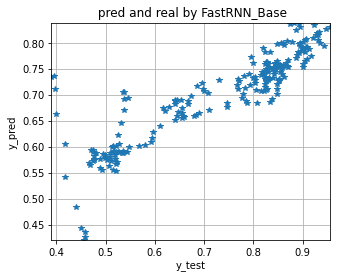

In [74]:
plt.figure(figsize=(5,4))
plt.plot(y_test,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_test),max(y_test)])
plt.ylim([min(y_pred),max(y_pred)])
plt.title(' pred and real by FastRNN_Base')
plt.show()

## 12.2 FastRNN-HOA

In [72]:
x=sol_opti_HOA.copy()

In [73]:
dict_fast=dict()
dict_fast['use_layer2']      =array_use[int_round(x[0])]
dict_fast['use_layer3']      =array_use[int_round(x[1])]
dict_fast['use_batchnorm']   =array_use[int_round(x[2])]
dict_fast['units1']          =array_units_rnn[int_round(x[3])]
dict_fast['active1']         =array_active[int_round(x[4])]
dict_fast['alpha1']    =np.round(x[5],4)
dict_fast['beta1']     =np.round(x[6],4)
dict_fast['units2']    =array_units_rnn[int_round(x[7])]
dict_fast['active2']   =array_active[int_round(x[8])]
dict_fast['alpha2']    =np.round(x[9],4)
dict_fast['beta2']     =np.round(x[10],4)
dict_fast['units3']    =array_units_rnn[int_round(x[11])]
dict_fast['active3']   =array_active[int_round(x[12])]
dict_fast['alpha3']    =np.round(x[13],4)
dict_fast['beta3']     =np.round(x[14],4)
dict_fast['dense1']    =array_units_dense[int_round(x[15])]
dict_fast['dense2']    =array_units_dense[int_round(x[16])]
dict_fast['drop']      =array_drop[int_round(x[17])]

print("_"*100)

for key, value in dict_fast.items():
    # print(".."*20)
    print(key,':',value)
print("_"*100)


____________________________________________________________________________________________________
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 16
active1 : sigmoid
alpha1 : -1.6662
beta1 : 5.3472
units2 : 8
active2 : sigmoid
alpha2 : -3.9475
beta2 : 2.9615
units3 : 32
active3 : sigmoid
alpha3 : -4.8481
beta3 : 3.9165
dense1 : 8
dense2 : 512
drop : 0.06
____________________________________________________________________________________________________


In [74]:
FastRNN_HOA=ceate_fast_rnn(X_train,dict_fast)
FastRNN_HOA.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fastRNN_1 (RNN)             (None, 7, 16)             1330      
                                                                 
 global_max_pooling1d_4 (Glo  (None, 16)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_15 (Dense)            (None, 8)                 136       
                                                                 
 dense_16 (Dense)            (None, 512)               4608      
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                           

In [ ]:
# fitness(x)

In [85]:
hist_model_FastRNN_HOA=FastRNN_HOA.fit(x=X_train, y=y_train,
                validation_data=(X_test,y_test),
                epochs=100,shuffle=True,
               batch_size=32)

Epoch 1/100
67/67 [==============================] - 2s 8ms/step - loss: 0.2732 - val_loss: 0.0902
Epoch 2/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0158 - val_loss: 0.0701
Epoch 3/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0115 - val_loss: 0.0462
Epoch 4/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0079 - val_loss: 0.0340
Epoch 5/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0054 - val_loss: 0.0246
Epoch 6/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0038 - val_loss: 0.0186
Epoch 7/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0027 - val_loss: 0.0148
Epoch 8/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0121
Epoch 9/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0108
Epoch 10/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 0.0100
Epoch 11/

In [86]:
from sklearn import metrics
y_pred=FastRNN_HOA.predict(X_test,verbose=0)

mse=metrics.mean_squared_error(y_test, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_test,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_test,y_pred) 
r2= metrics.r2_score(y_test, y_pred)
#----save to table --------
myTable.append(['FastRNN_HOA',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)



[['FastRNN_Base', 0.0094, 0.097, 0.0842, 0.635, 0.1238], ['FastRNN_HOA', 0.0042, 0.0645, 0.0459, 0.8389, 0.0664]]


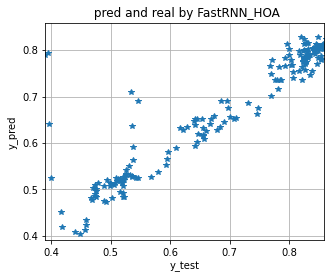

In [87]:
plt.figure(figsize=(5,4))
plt.plot(y_test,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_test),max(y_pred)])
plt.ylim([min(y_test),max(y_pred)])
plt.title(' pred and real by FastRNN_HOA')
plt.show()

## 12.3 FastRNN-SHO

In [75]:
x=best_sol_SHO.copy()

In [76]:
dict_fast=dict()
dict_fast['use_layer2']      =array_use[int_round(x[0])]
dict_fast['use_layer3']      =array_use[int_round(x[1])]
dict_fast['use_batchnorm']   =array_use[int_round(x[2])]
dict_fast['units1']          =array_units_rnn[int_round(x[3])]
dict_fast['active1']         =array_active[int_round(x[4])]
dict_fast['alpha1']    =np.round(x[5],4)
dict_fast['beta1']     =np.round(x[6],4)
dict_fast['units2']    =array_units_rnn[int_round(x[7])]
dict_fast['active2']   =array_active[int_round(x[8])]
dict_fast['alpha2']    =np.round(x[9],4)
dict_fast['beta2']     =np.round(x[10],4)
dict_fast['units3']    =array_units_rnn[int_round(x[11])]
dict_fast['active3']   =array_active[int_round(x[12])]
dict_fast['alpha3']    =np.round(x[13],4)
dict_fast['beta3']     =np.round(x[14],4)
dict_fast['dense1']    =array_units_dense[int_round(x[15])]
dict_fast['dense2']    =array_units_dense[int_round(x[16])]
dict_fast['drop']      =array_drop[int_round(x[17])]

print("_"*100)

for key, value in dict_fast.items():
    # print(".."*20)
    print(key,':',value)
print("_"*100)


____________________________________________________________________________________________________
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 4
active1 : tanh
alpha1 : 0.0
beta1 : 1.7679
units2 : 4
active2 : tanh
alpha2 : -0.2807
beta2 : 0.0
units3 : 4
active3 : sigmoid
alpha3 : -0.7072
beta3 : 1.061
dense1 : 1
dense2 : 64
drop : 0.0
____________________________________________________________________________________________________


In [77]:
FastRNN_SHO=ceate_fast_rnn(X_train,dict_fast)
FastRNN_SHO.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fastRNN_1 (RNN)             (None, 7, 4)              238       
                                                                 
 global_max_pooling1d_5 (Glo  (None, 4)                0         
 balMaxPooling1D)                                                
                                                                 
 dense_18 (Dense)            (None, 1)                 5         
                                                                 
 dense_19 (Dense)            (None, 64)                128       
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                           

In [92]:
hist_model_FastRNN_SHO=FastRNN_SHO.fit(x=X_train, y=y_train,
                validation_data=(X_test,y_test),
                epochs=100,shuffle=True,
               batch_size=32)

Epoch 1/100
67/67 [==============================] - 2s 11ms/step - loss: 0.0304 - val_loss: 0.0100
Epoch 2/100
67/67 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0107
Epoch 3/100
67/67 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0076
Epoch 4/100
67/67 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.0066
Epoch 5/100
67/67 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0069
Epoch 6/100
67/67 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0064
Epoch 7/100
67/67 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0060
Epoch 8/100
67/67 [==============================] - 0s 6ms/step - loss: 9.4011e-04 - val_loss: 0.0053
Epoch 9/100
67/67 [==============================] - 0s 6ms/step - loss: 9.2055e-04 - val_loss: 0.0054
Epoch 10/100
67/67 [==============================] - 0s 6ms/step - loss: 9.3196e-04 - val_loss: 0.0

67/67 [==============================] - 0s 6ms/step - loss: 5.3782e-04 - val_loss: 0.0033
Epoch 81/100
67/67 [==============================] - 0s 5ms/step - loss: 5.3131e-04 - val_loss: 0.0033
Epoch 82/100
67/67 [==============================] - 0s 6ms/step - loss: 5.1824e-04 - val_loss: 0.0035
Epoch 83/100
67/67 [==============================] - 0s 5ms/step - loss: 5.6376e-04 - val_loss: 0.0033
Epoch 84/100
67/67 [==============================] - 0s 5ms/step - loss: 5.4083e-04 - val_loss: 0.0033
Epoch 85/100
67/67 [==============================] - 0s 6ms/step - loss: 5.0177e-04 - val_loss: 0.0037
Epoch 86/100
67/67 [==============================] - 0s 5ms/step - loss: 5.0471e-04 - val_loss: 0.0043
Epoch 87/100
67/67 [==============================] - 0s 5ms/step - loss: 6.1490e-04 - val_loss: 0.0032
Epoch 88/100
67/67 [==============================] - 0s 5ms/step - loss: 5.7007e-04 - val_loss: 0.0036
Epoch 89/100
67/67 [==============================] - 0s 5ms/step - loss: 6.0

In [93]:
from sklearn import metrics
y_pred=FastRNN_SHO.predict(X_test,verbose=0)

mse=metrics.mean_squared_error(y_test, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_test,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_test,y_pred) 
r2= metrics.r2_score(y_test, y_pred)
#----save to table --------
myTable.append(['FastRNN_SHO',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)


[['FastRNN_Base', 0.0094, 0.097, 0.0842, 0.635, 0.1238], ['FastRNN_HOA', 0.0042, 0.0645, 0.0459, 0.8389, 0.0664], ['FastRNN_SHO', 0.0034, 0.0579, 0.0397, 0.8699, 0.0585]]


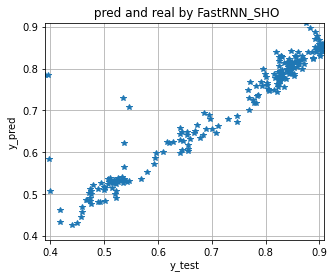

In [94]:
plt.figure(figsize=(5,4))
plt.plot(y_test,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_test),max(y_pred)])
plt.ylim([min(y_test),max(y_pred)])
plt.title(' pred and real by FastRNN_SHO')
plt.show()

## 12.4 GAN_Base

In [70]:
EPOCHS = 500

In [71]:
data_gen_train, data_gen_test = get_gen_train_test(data_normal)

generator = make_generator_model()
discriminator=make_discriminator_model()

learning_rate=1e-4
generator_optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.5)

@tf.function
def train_step(sequences, sequences_end):
  return train_step_def(sequences, sequences_end)

@tf.function
def test_step(sequences, sequences_end):
  return test_step_def(sequences, sequences_end)







Time for epoch 1  Generator Loss: 0.6816732883453369,  Discriminator_loss: 1.3871203660964966
Time for epoch 2  Generator Loss: 0.6858651638031006,  Discriminator_loss: 1.3827064037322998
Time for epoch 3  Generator Loss: 0.6904874444007874,  Discriminator_loss: 1.378219485282898
Time for epoch 4  Generator Loss: 0.6968813538551331,  Discriminator_loss: 1.3712505102157593
Time for epoch 5  Generator Loss: 0.7037248611450195,  Discriminator_loss: 1.3656524419784546
Time for epoch 6  Generator Loss: 0.7103810906410217,  Discriminator_loss: 1.3609941005706787
Time for epoch 7  Generator Loss: 0.7087366580963135,  Discriminator_loss: 1.361587405204773
Time for epoch 8  Generator Loss: 0.711435079574585,  Discriminator_loss: 1.3661558628082275
Time for epoch 9  Generator Loss: 0.7165006399154663,  Discriminator_loss: 1.357607126235962
Time for epoch 10  Generator Loss: 0.7171393036842346,  Discriminator_loss: 1.36398446559906
Time for epoch 11  Generator Loss: 0.7136375308036804,  Discrimin

Time for epoch 88  Generator Loss: 0.6992389559745789,  Discriminator_loss: 1.3732776641845703
Time for epoch 89  Generator Loss: 0.7011351585388184,  Discriminator_loss: 1.3802238702774048
Time for epoch 90  Generator Loss: 0.7009158730506897,  Discriminator_loss: 1.3737436532974243
Time for epoch 91  Generator Loss: 0.7047473192214966,  Discriminator_loss: 1.3741638660430908
Time for epoch 92  Generator Loss: 0.7036775946617126,  Discriminator_loss: 1.3760735988616943
Time for epoch 93  Generator Loss: 0.6966332793235779,  Discriminator_loss: 1.3788634538650513
Time for epoch 94  Generator Loss: 0.7002710700035095,  Discriminator_loss: 1.3787859678268433
Time for epoch 95  Generator Loss: 0.707374095916748,  Discriminator_loss: 1.3717907667160034
Time for epoch 96  Generator Loss: 0.702107846736908,  Discriminator_loss: 1.3801460266113281
Time for epoch 97  Generator Loss: 0.6993811130523682,  Discriminator_loss: 1.377798318862915
Time for epoch 98  Generator Loss: 0.705900251865387,

Time for epoch 174  Generator Loss: 0.7087599039077759,  Discriminator_loss: 1.3721380233764648
Time for epoch 175  Generator Loss: 0.7054744958877563,  Discriminator_loss: 1.3743565082550049
Time for epoch 176  Generator Loss: 0.7012960910797119,  Discriminator_loss: 1.3768675327301025
Time for epoch 177  Generator Loss: 0.7065040469169617,  Discriminator_loss: 1.3691916465759277
Time for epoch 178  Generator Loss: 0.7094473838806152,  Discriminator_loss: 1.3680723905563354
Time for epoch 179  Generator Loss: 0.7064378261566162,  Discriminator_loss: 1.3706765174865723
Time for epoch 180  Generator Loss: 0.7058873772621155,  Discriminator_loss: 1.3738758563995361
Time for epoch 181  Generator Loss: 0.7043174505233765,  Discriminator_loss: 1.3757069110870361
Time for epoch 182  Generator Loss: 0.7047334909439087,  Discriminator_loss: 1.3775806427001953
Time for epoch 183  Generator Loss: 0.7030081748962402,  Discriminator_loss: 1.3736027479171753
Time for epoch 184  Generator Loss: 0.70

Time for epoch 260  Generator Loss: 0.7104440331459045,  Discriminator_loss: 1.369716763496399
Time for epoch 261  Generator Loss: 0.7071958780288696,  Discriminator_loss: 1.3732519149780273
Time for epoch 262  Generator Loss: 0.7132012844085693,  Discriminator_loss: 1.3691270351409912
Time for epoch 263  Generator Loss: 0.7126624584197998,  Discriminator_loss: 1.3674062490463257
Time for epoch 264  Generator Loss: 0.7081473469734192,  Discriminator_loss: 1.3721412420272827
Time for epoch 265  Generator Loss: 0.7194709181785583,  Discriminator_loss: 1.3636295795440674
Time for epoch 266  Generator Loss: 0.7114784121513367,  Discriminator_loss: 1.371479868888855
Time for epoch 267  Generator Loss: 0.7140889763832092,  Discriminator_loss: 1.3686130046844482
Time for epoch 268  Generator Loss: 0.7111431360244751,  Discriminator_loss: 1.369057297706604
Time for epoch 269  Generator Loss: 0.7105297446250916,  Discriminator_loss: 1.3695138692855835
Time for epoch 270  Generator Loss: 0.70554

Time for epoch 346  Generator Loss: 0.7254447340965271,  Discriminator_loss: 1.3571676015853882
Time for epoch 347  Generator Loss: 0.7185385227203369,  Discriminator_loss: 1.365490436553955
Time for epoch 348  Generator Loss: 0.7235361337661743,  Discriminator_loss: 1.356388807296753
Time for epoch 349  Generator Loss: 0.7261728048324585,  Discriminator_loss: 1.359875202178955
Time for epoch 350  Generator Loss: 0.7171476483345032,  Discriminator_loss: 1.3694876432418823
Time for epoch 351  Generator Loss: 0.7256751656532288,  Discriminator_loss: 1.3611072301864624
Time for epoch 352  Generator Loss: 0.7290417551994324,  Discriminator_loss: 1.3620355129241943
Time for epoch 353  Generator Loss: 0.7230483293533325,  Discriminator_loss: 1.3585549592971802
Time for epoch 354  Generator Loss: 0.7262094020843506,  Discriminator_loss: 1.3607741594314575
Time for epoch 355  Generator Loss: 0.7167880535125732,  Discriminator_loss: 1.3698712587356567
Time for epoch 356  Generator Loss: 0.71776

Time for epoch 432  Generator Loss: 0.7381612658500671,  Discriminator_loss: 1.3506553173065186
Time for epoch 433  Generator Loss: 0.7433341145515442,  Discriminator_loss: 1.3524656295776367
Time for epoch 434  Generator Loss: 0.7389661073684692,  Discriminator_loss: 1.368736743927002
Time for epoch 435  Generator Loss: 0.7549399137496948,  Discriminator_loss: 1.3435399532318115
Time for epoch 436  Generator Loss: 0.7337707877159119,  Discriminator_loss: 1.3597058057785034
Time for epoch 437  Generator Loss: 0.7420133948326111,  Discriminator_loss: 1.3471531867980957
Time for epoch 438  Generator Loss: 0.7581177949905396,  Discriminator_loss: 1.3468157052993774
Time for epoch 439  Generator Loss: 0.7421121001243591,  Discriminator_loss: 1.3495523929595947
Time for epoch 440  Generator Loss: 0.7512982487678528,  Discriminator_loss: 1.354382872581482
Time for epoch 441  Generator Loss: 0.7418976426124573,  Discriminator_loss: 1.346357822418213
Time for epoch 442  Generator Loss: 0.73488

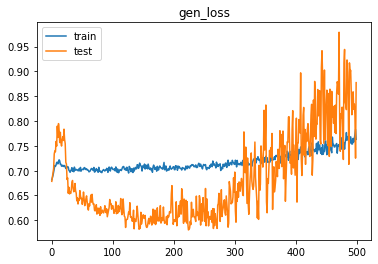

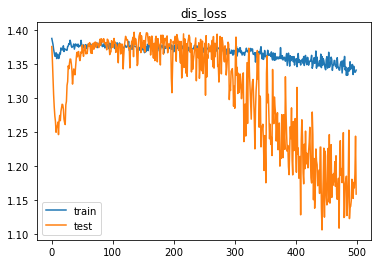

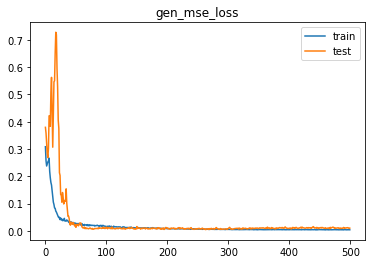

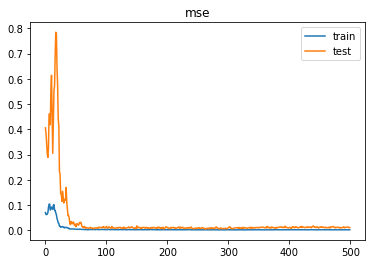

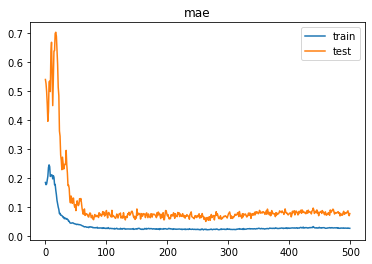

In [72]:
history, history_val = train(data_gen_train, data_gen_test, EPOCHS)
plot_history(history, history_val)


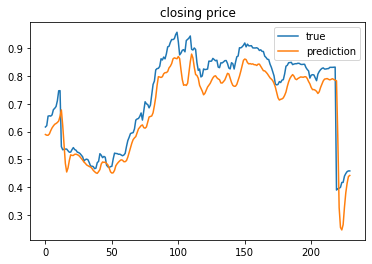

In [98]:
y_pred=[]
y_true=[]
for i in range(len(data_gen_test)):
  sequence, target = data_gen_test[i]
  y_pred .extend(generator.predict(sequence)[...,idx_col_GAN].tolist())
  y_true .extend(target[...,idx_col_GAN].tolist())

plt.figure()
plt.title("closing price")
plt.plot(y_true, label="true")
plt.plot(y_pred, label="prediction")
plt.legend()
plt.show()


In [100]:
from sklearn import metrics
import math

mse=metrics.mean_squared_error(y_true, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_true,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_true,y_pred) 
r2= metrics.r2_score(y_true, y_pred)
#----save to table --------
myTable.append(['GAN_Base',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)


[['FastRNN_Base', 0.0094, 0.097, 0.0842, 0.635, 0.1238], ['FastRNN_HOA', 0.0042, 0.0645, 0.0459, 0.8389, 0.0664], ['FastRNN_SHO', 0.0034, 0.0579, 0.0397, 0.8699, 0.0585], ['GAN_Base', 0.0046, 0.068, 0.0562, 0.8241, 0.0802]]


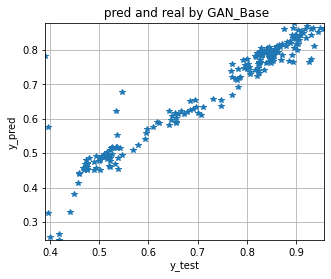

In [101]:
plt.figure(figsize=(5,4))
plt.plot(y_true,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_true),max(y_true)])
plt.ylim([min(y_pred),max(y_pred)])
plt.title(' pred and real by GAN_Base')
plt.show()

In [107]:
y_pred_GAN=y_pred

# **13. Final Result**

In [102]:
myTable=np.array(myTable)
print(myTable)

[['FastRNN_Base' '0.0094' '0.097' '0.0842' '0.635' '0.1238']
 ['FastRNN_HOA' '0.0042' '0.0645' '0.0459' '0.8389' '0.0664']
 ['FastRNN_SHO' '0.0034' '0.0579' '0.0397' '0.8699' '0.0585']
 ['GAN_Base' '0.0046' '0.068' '0.0562' '0.8241' '0.0802']]


In [148]:

data_res=pd.DataFrame(myTable,columns=["algorithm_name","MSE","RMSE","MAE","R2","MAPE"])
data_res=data_res[["algorithm_name","MSE","RMSE","MAE","MAPE","R2"]]
data_res[["MSE","RMSE","MAE","MAPE","R2"]]=data_res[["MSE","RMSE","MAE","MAPE","R2"]].astype(float)
data_res

,algorithm_name,MSE,RMSE,MAE,MAPE,R2
0,FastRNN_Base,0.0094,0.0970,0.0842,0.1238,0.6350
1,FastRNN_HOA,0.0042,0.0645,0.0459,0.0664,0.8389
2,FastRNN_SHO,0.0034,0.0579,0.0397,0.0585,0.8699
3,GAN_Base,0.0046,0.0680,0.0562,0.0802,0.8241


In [149]:
data_res.to_excel('out_1.xlsx')

In [134]:
y_pred_GAN=y_test[0:len(y_test)-len(y_pred)].reshape(-1).tolist()

In [135]:
y_pred_GAN.extend(y_pred)
y_pred_SHO=FastRNN_SHO.predict(X_test,verbose=0)
y_pred_HOA=FastRNN_HOA.predict(X_test,verbose=0)
y_pred_RNN=model_FastRNN_Base.predict(X_test,verbose=0)

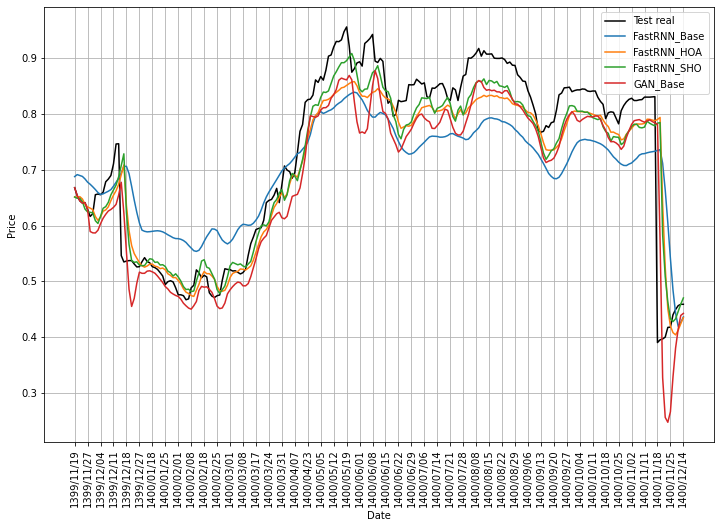

In [145]:
plt.figure(figsize=(12,8))
plt.plot(y_test,'k-',label='Test real')
plt.plot(y_pred_RNN,label='FastRNN_Base')
plt.plot(y_pred_HOA,label='FastRNN_HOA')
plt.plot(y_pred_SHO,label='FastRNN_SHO')
plt.plot(y_pred_GAN,label='GAN_Base')
idx=range(len(y_train),len(y_train)+len(y_test),5)
plt.xticks(range(0,len(y_test),5),data_main['تاریخ شمسی'].values[idx],rotation=90)
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(axis='both')
plt.legend()
plt.savefig('out1_final.png')
plt.show()


In [133]:
y_pred_GAN

In [146]:
import pickle
filename = 'fastrnn_1.pkl'
pickle.dump(model_FastRNN_Base, open(filename, 'wb'))

filename = 'FastRNN_SHO_1.pkl'
pickle.dump(FastRNN_SHO, open(filename, 'wb'))

filename = 'FastRNN_HOA_1.pkl'
pickle.dump(FastRNN_HOA, open(filename, 'wb'))

filename = 'GAN_Base_1.pkl'
pickle.dump(generator, open(filename, 'wb'))